
# Predicition Using Supervised Learning 

In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv("data12.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,RAD,TAX2,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CRIM       506 non-null    float64
 1   ZN         506 non-null    float64
 2   INDUS      506 non-null    float64
 3   CHAS       506 non-null    int64  
 4   NOX        506 non-null    float64
 5   RM         502 non-null    float64
 6   AGE        506 non-null    float64
 7   DIS        506 non-null    float64
 8   TAX        506 non-null    int64  
 9   RAD        506 non-null    int64  
 10  TAX2       506 non-null    float64
 11   PTRATIO   506 non-null    float64
 12  B          506 non-null    float64
 13  LSTAT      506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing['CHAS']

0      0
1      0
2      0
3      0
4      0
      ..
501    0
502    0
503    0
504    0
505    0
Name: CHAS, Length: 506, dtype: int64

In [6]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [7]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,RAD,TAX2,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,502.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.286323,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705041,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884250,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.209000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.628000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
%matplotlib inline

In [9]:
import matplotlib.pyplot as plt

In [10]:
#housing.hist(bins=50,figsize=(20,15))

## Train-Test Splitting


In [11]:
#for learning purpose 
import numpy as np

def split_train_test(data,test_ratio):
    np.random.seed(42)
    shuffled=np.random.permutation(len(data))
    print(shuffled)
    test_set_size=int(len(data) * test_ratio)
    test_indices=shuffled[:test_set_size]
    train_indices=shuffled[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

In [12]:
train_set,test_set=split_train_test(housing,0.2)

[173 274 491  72 452  76 316 140 471 500 218   9 414  78 323 473 124 388
 195 448 271 278  30 501 421 474  79 454 210 497 172 320 375 362 467 153
   2 336 208  73 496 307 204  68  90 390  33  70 470   0  11 281  22 101
 268 485 442 290  84 245  63  55 229  18 351 209 395  82  39 456  46 481
 444 355  77 398 104 203 381 489  69 408 255 392 312 234 460 324  93 137
 176 417 131 346 365 132 371 412 436 411  86  75 477  15 332 423  19 325
 335  56 437 409 334 181 227 434 180  25 493 238 244 250 418 117  42 322
 347 182 155 280 126 329  31 113 148 432 338  57 194  24  17 298  66 211
 404  94 154 441  23 225 433 447   5 116  45  16 468 360   3 405 185  60
 110 321 265  29 262 478  26   7 492 108  37 157 472 118 114 175 192 272
 144 373 383 356 277 220 450 141 369  67 361 168 499 394 400 193 249 109
 420 145  92 152 222 304  83 248 165 163 199 231  74 311 455 253 119 284
 302 483 357 403 228 261 237 386 476  36 196 139 368 247 287 378  59 111
  89 266   6 364 503 341 158 150 177 397 184 318  1

In [13]:
#print(f"Rows in train set:{len(train_set)}\nRows in test set:{len(test_set)}\n")

In [14]:
from sklearn.model_selection import train_test_split
train_set, test_set=train_test_split(housing, test_size=0.2,random_state=42)
print(f"Rows in train set:{len(train_set)}\nRows in test set:{len(test_set)}\n")

Rows in train set:404
Rows in test set:102



In [15]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_set= housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [16]:
strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [17]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [18]:
# 95/7

In [19]:
# 376/28

In [20]:
hosuing=strat_train_set.copy()

# Looking for correlation

In [21]:
corr_matrix=housing.corr()

In [22]:
corr_matrix['TAX'].sort_values(ascending =False)

TAX          1.000000
RAD          0.910228
CRIM         0.625505
NOX          0.611441
INDUS        0.595129
B            0.488676
TAX2         0.464741
AGE          0.456022
CHAS        -0.007368
RM          -0.212780
ZN          -0.311948
LSTAT       -0.381626
 PTRATIO    -0.444413
DIS         -0.494588
Name: TAX, dtype: float64

array([[<Axes: xlabel='B', ylabel='B'>, <Axes: xlabel='RM', ylabel='B'>,
        <Axes: xlabel='ZN', ylabel='B'>,
        <Axes: xlabel='LSTAT', ylabel='B'>],
       [<Axes: xlabel='B', ylabel='RM'>,
        <Axes: xlabel='RM', ylabel='RM'>,
        <Axes: xlabel='ZN', ylabel='RM'>,
        <Axes: xlabel='LSTAT', ylabel='RM'>],
       [<Axes: xlabel='B', ylabel='ZN'>,
        <Axes: xlabel='RM', ylabel='ZN'>,
        <Axes: xlabel='ZN', ylabel='ZN'>,
        <Axes: xlabel='LSTAT', ylabel='ZN'>],
       [<Axes: xlabel='B', ylabel='LSTAT'>,
        <Axes: xlabel='RM', ylabel='LSTAT'>,
        <Axes: xlabel='ZN', ylabel='LSTAT'>,
        <Axes: xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

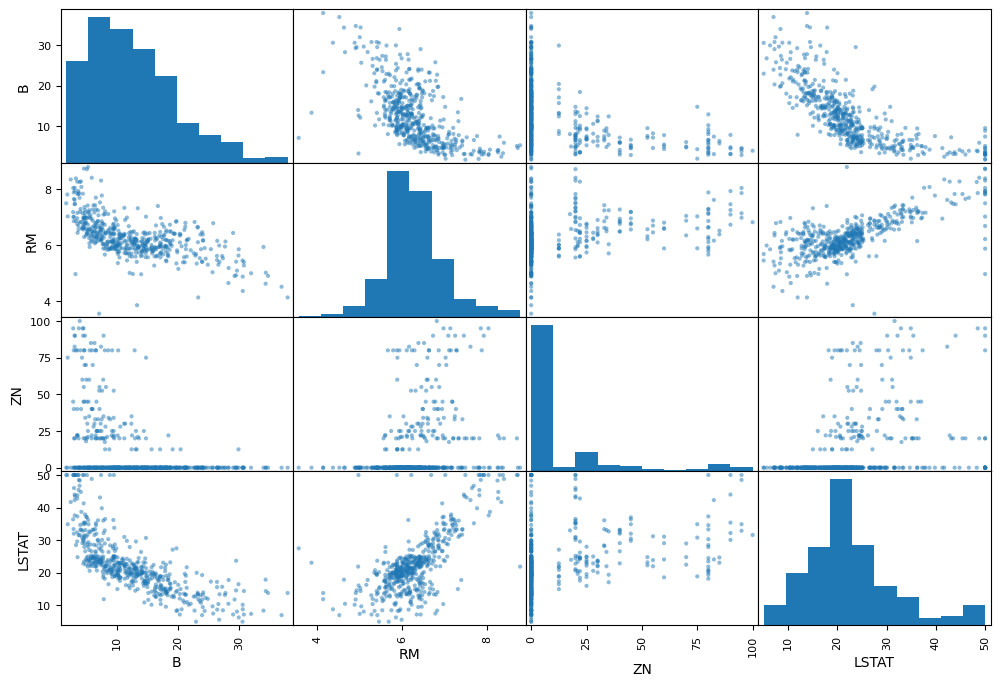

In [23]:
from pandas.plotting import scatter_matrix
attributes=["B","RM","ZN","LSTAT"]
scatter_matrix(housing[attributes],figsize=(12,8))

<Axes: xlabel='LSTAT', ylabel='B'>

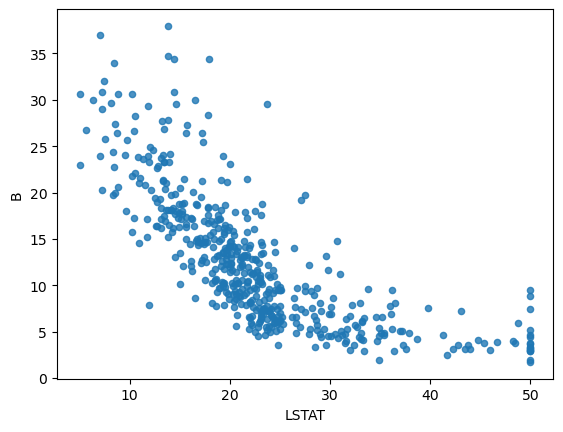

In [24]:
housing.plot(kind="scatter",x="LSTAT" ,y="B" ,alpha=0.8)

In [25]:
housing =strat_train_set.drop("B",axis=1)
housing_labels=strat_train_set["B"].copy()

## Missing Attribute

In [26]:
#To take care of missing attributes,you have three options:
 #   1.Get rid of the missing datapoint 
 #   2.Get rid of the whole attribute
 #   3.Set the value to some value(0,mean or median)

In [27]:
a=housing.dropna(subset=["RM"]) #option 1
a.shape

(401, 13)

In [28]:
housing.drop("RM",axis=1).shape#option 2
#there is no rm column and also note that the orignal housing dataframe will remain unchanged 



(404, 12)

In [29]:
median=housing["RM"].median()#option 3 comput median foe option 3

In [30]:
housing["RM"].fillna(median)
#note that the orignal housing dataframe will remain unchanged 

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [31]:
housing.shape

(404, 13)

In [32]:
housing.describe()#before we started filling missing attribute 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,RAD,TAX2,PTRATIO,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,401.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.281352,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,22.509406
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.715312,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,9.385531
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,5.000000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878000,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,16.600000
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.211000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,21.150000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.631000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,25.000000
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,50.000000


In [33]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median" ) 
imputer.fit(housing)

SimpleImputer(strategy='median')

In [34]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21100e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 2.11500e+01])

In [35]:
x=imputer.transform(housing)

In [36]:
housing_tr=pd.DataFrame(x,columns=housing.columns)

In [37]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,RAD,TAX2,PTRATIO,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.280829,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,22.509406
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712670,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,9.385531
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,5.000000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,16.600000
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.211000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,21.150000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,25.000000
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,50.000000


# scikit learn Design

# Primarily,three types of objects
1.Estimators-IT estimate some parameter ased on dataset .Eg-imputer 
It has fit method and transform method.
Fit method-Fits dataset and calculates internal parameters

2.Transformers-Transform method takes input and returns outout based on the learning from fit().
It also has a convience function called fit transforms()which fits and then transform.

3.Predictors-LinearRegression model is an example of predictor .fit() and predict()
are two common functions. It also gives score function which willevalute the predictons.


# Feature scaling 

primarliy, two types of feature scaling method
 1. Min Max scaling (Normalization)
        (value-min)/(max-min)
        Sklearn provides a class called MinMaxScaler for this 

 2.Standarization
    (value-min)/std
    Sklearn provides a class called StandardSclaer for this 

# Creating a pipline

In [38]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler 
my_pipeline=Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
    #..... add as many as you want in your pipeline 
    ('std-scaler',StandardScaler()),
])

In [39]:
housing_num_tr=my_pipeline.fit_transform(housing)

In [40]:
housing_num_tr.shape

(404, 13)

# SELECTING A DESIRED MODEL FOR House Price Prediction


In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
model=LinearRegression()   
#model=DecisionTreeRegressor()
#model = RandomForestRegressor()
model.fit(housing_num_tr, housing_labels)
    

LinearRegression()

In [42]:
some_data=housing.iloc[:5]

In [43]:
some_labels=housing_labels.iloc[:5]

In [44]:
prepared_data=my_pipeline.transform(some_data)

In [45]:
model.predict(prepared_data)

array([ 9.06660341,  7.62904793, 16.89312645, 10.04395885,  8.21210228])

In [46]:
list(some_labels)

[6.57, 5.99, 18.68, 6.87, 6.15]

# Evaluating the model

In [47]:
from sklearn.metrics import mean_squared_error
housing_predictions=model.predict(housing_num_tr)
mse=mean_squared_error(housing_labels, housing_predictions)
rmse=np.sqrt(mse)

In [48]:
rmse

3.79555663030695

 Using better evaluating technique -Cross Validation

In [49]:
#1 2 3 4 5 6 7 8 9 10
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,housing_num_tr,housing_labels,scoring="neg_mean_squared_error",cv=10)
rmse_scores=np.sqrt(-scores)

In [50]:
rmse_scores

array([4.25011554, 3.67002711, 4.00709747, 3.13152146, 4.87086612,
       4.51129387, 3.83128745, 4.31669976, 2.97939806, 4.38354598])

In [51]:
def print_scores(scores):
    print("Scores:",scores)
    print("Mean:",scores.mean())
    print("Standard deviation: ",scores.std())

In [52]:
print_scores(rmse_scores)

Scores: [4.25011554 3.67002711 4.00709747 3.13152146 4.87086612 4.51129387
 3.83128745 4.31669976 2.97939806 4.38354598]
Mean: 3.995185281714985
Standard deviation:  0.571212844395603


# Saving the Model

In [53]:
from joblib import dump,load 
dump(model,'Dargon.joblib')

['Dargon.joblib']

# Testing the model on test data

In [54]:
x_test=strat_test_set.drop("B",axis=1)
y_test=strat_test_set["B"].copy()
x_test_prepared =my_pipeline.transform(x_test)
final_predictions=model.predict(x_test_prepared)
final_mse= mean_squared_error(y_test,final_predictions)
final_rmse=np.sqrt(final_mse)
#print(final_predictions,list(y_test))

In [55]:
final_rmse

3.7170838290246153

In [56]:
prepared_data[0]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24281007, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.06501087])

# Using the model

In [57]:
from joblib import dump,load
import numpy as np
model=load('Dargon.joblib')
features  = np.array([-5.43942006,  7.12628155, -1.12165014, -0.27288841, -56.42262747,
       -0.24281007, -1.31238772,  99.61111401, -1.0016859 , -0.5778192 ,
       -636.97491834,  0.41164221, -23.06501087])
model.predict([features])

array([253.04472413])